# Imports and Reading Data

In [1307]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import sys


In [1308]:
filename = 'courseRecSys.xlsx'
splitProp = 0.95

In [1309]:
def read_data(filename):
    df = pd.read_excel(filename,
    header=0,
    index_col=False,
    keep_default_na=True
    )
    return df

In [1310]:
def preprocess(df):
    df=df.drop(['Start time','Completion time','Email','Name','Name(not mandatory)\n','ID'], axis=1)
    #replacing nan with mean of users
    # df["avg"] = df.mean(axis = 1, skipna=True, numeric_only=True)
    # df=df.apply(lambda row: row.fillna(row["avg"]), axis=1)
    # df = df.drop(["avg"],axis =1)
    #replacing nan with mean of courses
    df=df.apply(lambda x: x.fillna(x.mean()),axis=0)
    return df

In [1311]:
df=read_data(filename)
df = preprocess(df)
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.620098,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.600000,0.423286,0.396622,0.510897
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.200000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.500000,0.423286,0.396622,0.510897
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.800000,0.900000,1.000000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.400000,0.423286,0.396622,0.510897
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.750000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.800000,0.452708,0.423286,0.800000,0.510897
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.400000,0.400000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.700000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.000000,0.423286,0.396622,0.510897
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.000000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.200000
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.500000,0.400000,0.200000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,1.000000,0.423286,0.396622,1.000000
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.620098,0.572638,0.700000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.510897


In [1312]:
train,test = train_test_split(df,train_size=splitProp, random_state=42,shuffle = True)

In [1313]:
df.shape

(162, 25)

In [1314]:
test.shape

(9, 25)

In [1315]:
df.isna().sum()

Data Structures and Algorithms                                0
Computer Architecture\n                                       0
Discrete Mathematics\n                                        0
Economics                                                     0
Programming-2                                                 0
Machine Learning\n                                            0
Mathematics For Machine Learning\n                            0
Visual Recognition\n                                          0
Natural Language Processing\n                                 0
Reinforcement Learning                                        0
Software Production Engineering\n                             0
Computer Graphics\n                                           0
Data Visualization\n                                          0
Programming Languages\n                                       0
Cloud Computing\n                                             0
Digital CMOS VLSI Design                

In [1316]:
courses = df.columns
courses

Index(['Data Structures and Algorithms', 'Computer Architecture\n',
       'Discrete Mathematics\n', 'Economics', 'Programming-2',
       'Machine Learning\n', 'Mathematics For Machine Learning\n',
       'Visual Recognition\n', 'Natural Language Processing\n',
       'Reinforcement Learning', 'Software Production Engineering\n',
       'Computer Graphics\n', 'Data Visualization\n',
       'Programming Languages\n', 'Cloud Computing\n',
       'Digital CMOS VLSI Design ', 'System design with FPGA ', 'ASIC design ',
       'VLSI Architecture Design\n',
       'High level synthesis and optimization of Digital Circuits ',
       'Digital Sociology ', 'Privacy in the Digital Age',
       'Technology Ethics and AI ', 'Techno-economics of networks ',
       'The Web and the Mind '],
      dtype='object')

In [1317]:
core_courses = ['Data Structures and Algorithms','Computer Architecture\n','Discrete Mathematics\n','Economics','Programming-2']

# K-means

In [1318]:
def visualize(point):
    wcss = []  #Within Cluster Sum of Squares
    for number_of_clusters in range(1, 15): 
        kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
        kmeans.fit(df[core_courses]) 
        wcss.append(kmeans.inertia_)
    ks = np.arange(1,15,1)
    plt.plot(ks, wcss)
    plt.axvline(point, linestyle='--', color='r')
    return wcss

[82.11226015529861,
 63.24078648485308,
 51.59371019141971,
 44.925208436514524,
 39.88330675972086,
 36.1746361281475,
 33.398702023260036,
 30.5695359693512,
 28.1421428563879,
 25.519097800451988,
 24.303521924994463,
 22.250775245363172,
 21.26505642848125,
 19.7185773653146]

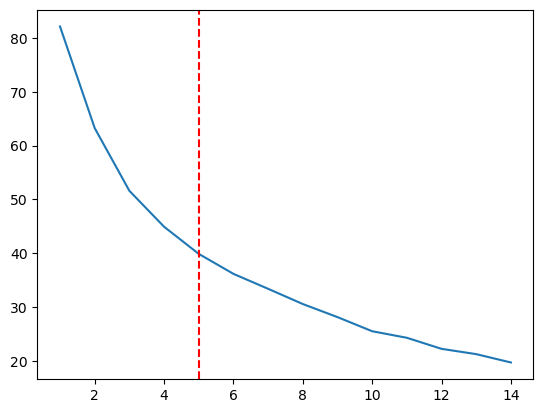

In [1319]:
visualize(5)

In [1320]:
def K_means(df, num_clusters, iters):
    np_dat = df.to_numpy()
    # Initialize the centroids
    range_min = np.min(np_dat, axis = 0)
    range_max = np.max(np_dat, axis = 0)
    curr_centroids = []
    np.random.seed(200)
    for i in range(num_clusters):
        curr_centroids.append(np.random.uniform(range_min, range_max))
    clusters = {}
    for it in range(iters):
        # Repopulate clusters
        clusters.clear()
        for j in range(np_dat.shape[0]):
            datapoint = np_dat[j]
            min = sys.maxsize
            min_index = 10
            for k in range(num_clusters):
                dist = np.linalg.norm(curr_centroids[k] - datapoint)
                if(dist < min):
                    min = dist
                    min_index = k
            if(clusters.get(str(min_index)) == None):
                clusters[str(min_index)] = []
            clusters[str(min_index)].append(j)
        
        # Recalculate Centroids
        new_centroids = []
        for k in range(num_clusters):
            key = str(k)
            if(clusters.get(key) == None): 
                n_centr = curr_centroids[k]
                #n_centr = np.random.uniform(range_min, range_max)
            else: n_centr = np.mean(np_dat[np.array(clusters[key])], axis = 0)
            new_centroids.append(n_centr)
        
        #if((np.not_equal(new_centroids, curr_centroids).any()) != True ): break
        curr_centroids = new_centroids
    return clusters


In [1321]:
def get_clustered_df(df,num_clusters):
    cluster_dict = K_means(df[core_courses], num_clusters, 50)
    clustered_df =[]
    arr = df.to_numpy()
    for k in range(num_clusters):
        key = str(k)
        centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)
        clustered_df.append(centr)
    return clustered_df

In [1322]:
def old_get_clustered_df(df,num_clusters):
    kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
    clustered_matrix = kmeans.fit_predict(df[core_courses]) 
    # print(clustered_matrix.shape)
    arr = df.to_numpy()
    clustered_df = []
    for i in range(num_clusters):
        users = 0
        s=np.zeros(25)
        for j in range(len(clustered_matrix)):#162
            
            if clustered_matrix[j]==i:
                s+=arr[j]
                users = users + 1
        mean = s/users
        clustered_df.append(mean)
    return clustered_df

In [1323]:
clustered_df = old_get_clustered_df(df,10)

# SVD

In [1324]:
def svd(A):
    # Step 1: Compute the transpose of A
    AT = A.T
    # Step 2: Compute the product A x AT
    ATA = A.dot(AT)
    # Step 3: Compute the eigenvalues and eigenvectors of ATA
    eigenvalues, eigenvectors = np.linalg.eig(ATA)
    # Step 4: Sort the eigenvalues in descending order
    sorted_idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    # Step 5: Compute the diagonal matrix Sigma
    Sigma = np.sqrt(eigenvalues)
    # Step 6: Compute the pseudo-inverse of Sigma
    inv_Sigma = np.zeros((A.shape[1], A.shape[0]))
    #print(A.shape)
    inv_Sigma[:A.shape[0], :A.shape[0]] = np.diag(1.0 / Sigma)
    # Step 7: Compute the product AT x V x inv(Sigma)
    V = AT.dot(eigenvectors)
    # Step 8: Normalize the columns of V
    V = V / np.linalg.norm(V, axis=0)
    # Step 9: Compute the product A x U x Sigma^-1
    U = A.dot(V) / Sigma
    return U, Sigma, V.T

In [1325]:
U,sigma,VT = svd(np.array(clustered_df))

In [1326]:
U.shape,sigma.shape,VT.shape

((10, 10), (10,), (10, 25))

In [1327]:
k=6

In [1328]:
def reduced_svd(k,A):
    U,sigma,VT = svd(A)
    reduced_matrix = np.dot(np.dot(U[:,:k],np.diag(sigma[:k])),VT[:k,:])
    return reduced_matrix


In [1329]:
reduced_matrix = reduced_svd(k,np.array(clustered_df))

# Prediction

In [1330]:
def EuclDist(vec1,vec2):
    return np.linalg.norm(vec1 - vec2)

new user with just core courses ratings. Now we need elective courses

In [1331]:
new_user = [0.2,0.8,0.2,0.6,0.9]
new_user2 =[ 0.699459,	0.545405	,0.325405	,0.615135	,0.737838]
sooraj = [0.4, 0.8,0.85,0.9,0.7]
chinmay = [0.9,0.2,0.4,0.6 ,0.8]
kritin = [0,0,0,0,0]

In [1332]:
def find_cluster(reduced_matrix,new_user):
    
    min=EuclDist(reduced_matrix[0,:5],new_user)
    cluster = 0
    for i in range(len(reduced_matrix)):
        sim = EuclDist(reduced_matrix[i,:5],new_user)#euclidean distance
        # print(sim)
        if sim<min:
            min = sim
            cluster=i
    return cluster


In [1333]:
find_cluster(reduced_matrix,kritin)#testing

3

In [1334]:
def find_elective_ratings(reduced_matrix,new_user):
    cluster = find_cluster(reduced_matrix,new_user)
    elective_ratings = reduced_matrix[cluster,5:]
    return elective_ratings


In [1335]:
def find_elective_ratings_from_og(reduced_matrix,original,new_user):
    cluster = find_cluster(reduced_matrix,new_user)
    elective_ratings = original[cluster,5:]
    return elective_ratings


In [1336]:
elective_ratings = find_elective_ratings(reduced_matrix,kritin)

In [1337]:
elective_ratings2 = find_elective_ratings_from_og(reduced_matrix,np.array(clustered_df),kritin)

# Ranking of electives

In [1338]:
def get_electives_ranked(courses,elective_ratings):
    d={courses[5:][i]: elective_ratings[i] for i in range(20)}

    elective_ranked = sorted(courses[5:], key=lambda x : -d[x])
    return elective_ranked  

In [1339]:
elective_ranked = get_electives_ranked(courses,elective_ratings)


In [1340]:
elective_ranked

['Machine Learning\n',
 'Software Production Engineering\n',
 'Mathematics For Machine Learning\n',
 'Reinforcement Learning',
 'Visual Recognition\n',
 'Cloud Computing\n',
 'Programming Languages\n',
 'Natural Language Processing\n',
 'Data Visualization\n',
 'The Web and the Mind ',
 'Computer Graphics\n',
 'Privacy in the Digital Age',
 'Technology Ethics and AI ',
 'Digital CMOS VLSI Design ',
 'Digital Sociology ',
 'VLSI Architecture Design\n',
 'System design with FPGA ',
 'Techno-economics of networks ',
 'ASIC design ',
 'High level synthesis and optimization of Digital Circuits ']

In [1341]:
elective_ranked2 = get_electives_ranked(courses,elective_ratings2)
elective_ranked2

['Machine Learning\n',
 'Software Production Engineering\n',
 'Programming Languages\n',
 'Mathematics For Machine Learning\n',
 'Reinforcement Learning',
 'Cloud Computing\n',
 'Visual Recognition\n',
 'Natural Language Processing\n',
 'Data Visualization\n',
 'Computer Graphics\n',
 'The Web and the Mind ',
 'Technology Ethics and AI ',
 'Privacy in the Digital Age',
 'Digital CMOS VLSI Design ',
 'Techno-economics of networks ',
 'Digital Sociology ',
 'System design with FPGA ',
 'VLSI Architecture Design\n',
 'ASIC design ',
 'High level synthesis and optimization of Digital Circuits ']

change the nan values to average of the item instead of average of user ratings. -- done

in find elective rating find the ratings from the clustered matrix and not reduced matrix.

# Training and Testing

In [1342]:
def train_recommendations(X_train,num_clusters, k_svd):
    clustered_df=get_clustered_df(X_train,num_clusters)
    reduced_matrix=reduced_svd(k_svd,np.array(clustered_df))
    return reduced_matrix

In [1343]:
def old_train_recommendations(X_train,num_clusters):
    clustered_df=old_get_clustered_df(X_train,num_clusters)
    reduced_matrix=reduced_svd(6,np.array(clustered_df))
    return reduced_matrix

In [1344]:
def test_recommendations(X_test,reduced_matrix):
    pred = []
    for i in range(len(X_test)):
        new_user = X_test[i]
        elective_ratings = find_elective_ratings(reduced_matrix,new_user[:5])
        elective_ranked = get_electives_ranked(courses,elective_ratings)
        pred.append(elective_ratings)
    return pred


In [1345]:
def accuracy(pred,test):
    mse =[]
    for i in range(len(pred)):
        mse.append((EuclDist(pred[i],test[i][5:])))

    return sum(mse)/len(mse)

In [1346]:
reduced_matrix = train_recommendations(train, 10, 5)

In [1347]:
pred=test_recommendations(test.to_numpy(),reduced_matrix)

In [1348]:
accuracy(pred,test.to_numpy())

1.3524119519186255

# Analysis

## Cluster Size, Singular Values

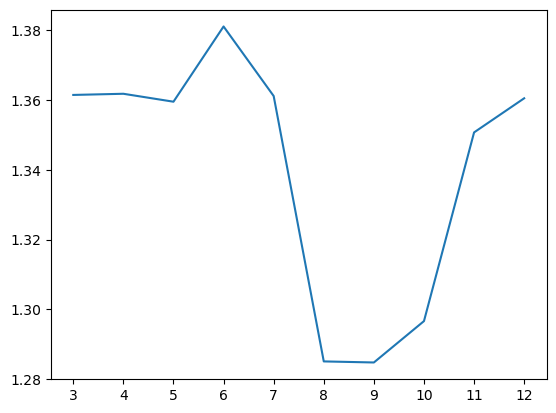

In [1349]:
lt = [3,4,5,6,7,8,9,10,11,12]
acc = []
for num_clusters in lt:
    reduced_matrix = train_recommendations(train,num_clusters, 6)
    pred=test_recommendations(test.to_numpy(),reduced_matrix)
    acc.append(accuracy(pred,test.to_numpy()))
x = lt
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, acc)
plt.xticks(default_x_ticks, x)
plt.show()   

([<matplotlib.axis.XTick at 0x157d0d190>,
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10')])

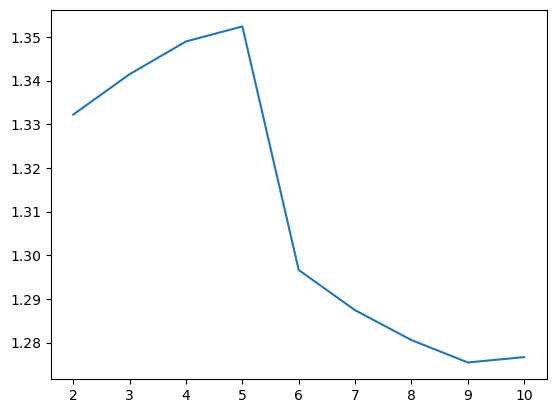

In [1350]:
k_list = [2,3,4,5,6,7,8,9,10]
acc = []
for k_svd in k_list:
    reduced_matrix = train_recommendations(train,10, k_svd)
    pred=test_recommendations(test.to_numpy(),reduced_matrix)
    acc.append(accuracy(pred,test.to_numpy()))
x = k_list
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, acc)
plt.xticks(default_x_ticks, x)

In [1351]:
# for i in pred:
#     elective_ranked = get_electives_ranked(courses,i)
#     print(elective_ranked)
#     print("*****************")

## Cluster Visualisation

ValueError: n_components=3 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

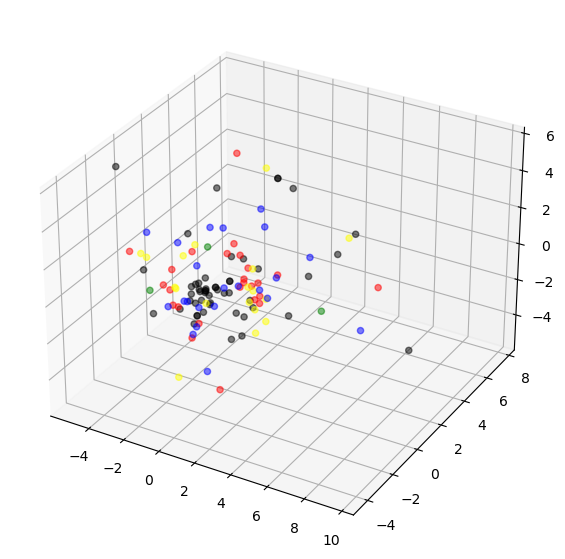

In [1352]:
from sklearn.decomposition import PCA
cluster_dict = K_means(df[core_courses], 10, 50) 
PCA_components = []
colours = ["red", "green", "blue", "yellow", "black", "purple", "pink", "orange", "cyan", "olive"]
plt.figure(figsize = (20, 7))
ax = plt.axes(projection ="3d")
for k in range(10):
    # pand = pd.DataFrame(arr[np.array(cluster_dict[str(k)])], columns=courses)
    # print(arr[np.array(cluster_dict[str(k)])])
    X_std = StandardScaler().fit_transform(df.loc[df.index.isin(cluster_dict[str(k)])])
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(X_std)
    # Plot the explained variances
    features = range(pca.n_components_)
    # plt.bar(features, pca.explained_variance_ratio_, color="red")
    # plt.xlabel('PCA features')
    # plt.ylabel('variance %')
    # plt.xticks(features)
    # Save components to a DataFrame
    PCA_components = pd.DataFrame(principalComponents)
    ax.scatter3D(PCA_components[0], PCA_components[1],PCA_components[2], alpha=.5, color=colours[k])

In [ ]:
# ks = range(1, 10)
# inertias = []
# for k in ks:
#     # Create a KMeans instance with k clusters: model
#     model = KMeans(n_clusters=k)
    
#     # Fit model to samples
#     model.fit(PCA_components.iloc[:,:3])
    
#     # Append the inertia to the list of inertias
#     inertias.append(model.inertia_)
    
# plt.plot(ks, inertias, '-o', color='black')
# plt.xlabel('number of clusters, k')
# plt.ylabel('inertia')
# plt.xticks(ks)
# plt.show()